#SVM Classification

In [6]:
#import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [7]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### SVM Boundary Plotting Function

In [27]:
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html


def plot_svm_boundary(model, X, Y, figsize=(8,6),title="SVM Boundary Plot"):
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(figsize=(8,6))
    plt.clf()
   
    # Data Scatter Plot
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    Z = Z.reshape(XX.shape)
    ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired,shading='auto')
    ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 100,
                facecolors='none', zorder=10, edgecolors='k', linewidth=1)
    
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.show()

## Linear Data Classification (1.5 point)

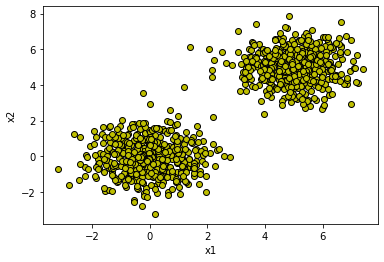

In [123]:
## Read the documentation of the SVM class at 
## https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
## Describe the role of
## C:It is a floating value which is a regularization parameter, it's value is inversely propotional to the strength of regularization
##
## kernel:The name of the kernel function to be used in SVM 
##
## gamma:The coefficient in radial basis function(rbf), polynomial and sigmoid function.
##
## degree:The degree of polynomial function

## load linear dataset
linear_train_csv = pd.read_csv('/content/drive/MyDrive/data/data_linear_train.csv')
linear_test_csv = pd.read_csv('/content/drive/MyDrive/data/data_linear_test.csv')
linear_train_X=linear_train_csv.loc[:,linear_train_csv.columns != 'y']
linear_train_y=linear_train_csv[['y']]
plt.scatter(linear_train_X.iloc[:, 0], linear_train_X.iloc[:, 1], c=linear_train_y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## plot training data

In [124]:
## create an instance of the SVC(kernel=”linear”,C=0.1) 
model = SVC(kernel='linear',C=0.1)
## fit the model
model.fit(linear_train_X,linear_train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


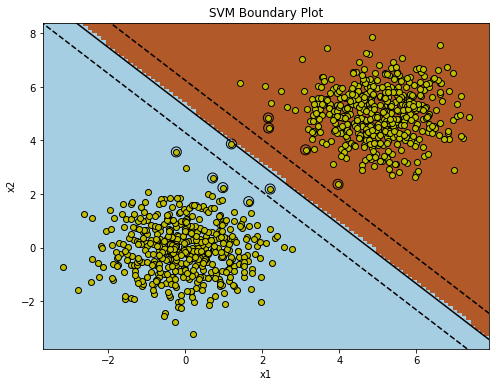

In [131]:
## plot svm boundary 
plot_svm_boundary(model,linear_train_X,linear_train_y)
## you can use above mentioned function for plotting

In [129]:
## print the confusion matrix, accuracy scores for training data.
train_predict = model.predict(linear_train_X)
print(classification_report(y_true=linear_train_y,y_pred=train_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       490
         1.0       1.00      1.00      1.00       490

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



In [130]:
## predict labels for linear test dataset
predictions=model.predict(linear_test_csv)

In [65]:
## saving linear test result datframe to csv file
linear_test_csv['linear_kernel_prediction'] = predictions
linear_test_csv.to_csv("data_linear_test.csv")

#Non-Linear SVM Classifier

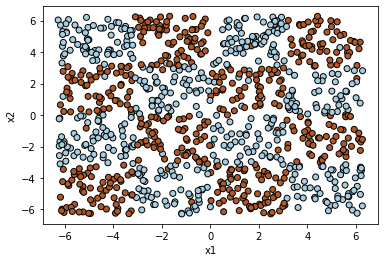

In [132]:
## loading non-linear dataset
nonlinear_train_csv = pd.read_csv('/content/drive/MyDrive/data/data_nonlinear_train.csv')
nonlinear_train_X = nonlinear_train_csv.loc[:,nonlinear_train_csv.columns != 'y']
nonlinear_train_y = nonlinear_train_csv['y']
## plotting training data
plt.scatter(nonlinear_train_X.iloc[:, 0], nonlinear_train_X.iloc[:, 1], c=nonlinear_train_y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

###Linear Kernel

In [104]:
## SVC class with linear kernel and C = 0.1
model_svc_linear = SVC(kernel='linear',C=0.1)
model_svc_linear.fit(nonlinear_train_X, nonlinear_train_y)

SVC(C=0.1, kernel='linear')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


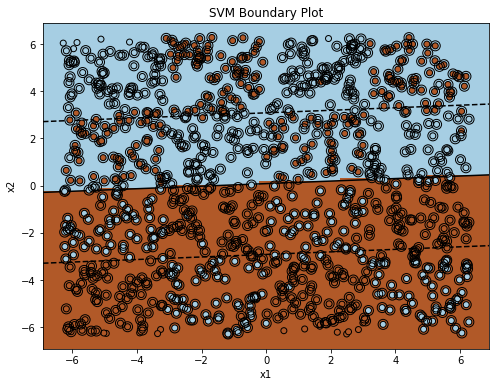

In [106]:
## plot svm boundary
plot_svm_boundary(model_svc_linear,nonlinear_train_X,nonlinear_train_y)

In [115]:
## print the confusion matrix, accuracy scores for training data.
nonlinear_train_y_pred_linear = model_svc_linear.predict(nonlinear_train_X)
print(classification_report(y_true=nonlinear_train_y,y_pred=nonlinear_train_y_pred_linear))

              precision    recall  f1-score   support

         0.0       0.51      0.52      0.52       486
         1.0       0.52      0.51      0.52       494

    accuracy                           0.52       980
   macro avg       0.52      0.52      0.52       980
weighted avg       0.52      0.52      0.52       980



In [108]:
## load non-linear test data
nonlinear_test_csv = pd.read_csv('/content/drive/MyDrive/data/data_nonlinear_test.csv')
nonlinear_test_X = nonlinear_test_csv

In [109]:
## predicting labels for non-linear test dataset
nonlinear_test_y_pred_linear = model_svc_linear.predict(nonlinear_test_X)

### Polynomial Kernel

In [110]:
## SVC Class with polynomial kernel, degree = 2 and C = 0.1
model_svc_poly = SVC(kernel='poly',degree=2,C=0.1)
model_svc_poly.fit(nonlinear_train_X, nonlinear_train_y)

SVC(C=0.1, degree=2, kernel='poly')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


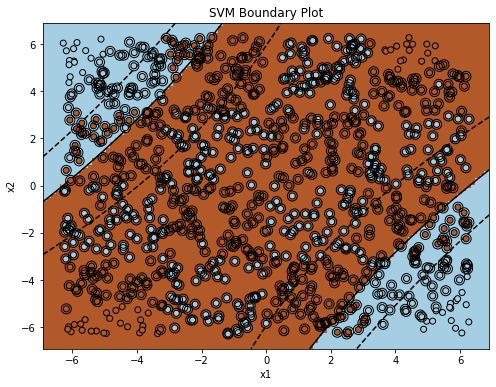

In [111]:
## plot svm boundary
plot_svm_boundary(model_svc_poly,nonlinear_train_X,nonlinear_train_y)

In [114]:
## print the confusion matrix, accuracy scores for training data.
nonlinear_train_y_pred_poly = model_svc_poly.predict(nonlinear_train_X)
print(classification_report(y_true=nonlinear_train_y,y_pred=nonlinear_train_y_pred_poly))

              precision    recall  f1-score   support

         0.0       0.62      0.26      0.36       486
         1.0       0.54      0.84      0.66       494

    accuracy                           0.55       980
   macro avg       0.58      0.55      0.51       980
weighted avg       0.58      0.55      0.51       980



In [113]:
## predicting labels for non-linear test dataset
nonlinear_test_y_pred_poly = model_svc_poly.predict(nonlinear_test_X)


### RBF Kernel

In [116]:
## SVC Class with RBF kernel and C=0.1
model_svc_rbf = SVC(kernel='rbf',C=0.1)
model_svc_rbf.fit(nonlinear_train_X, nonlinear_train_y)

SVC(C=0.1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


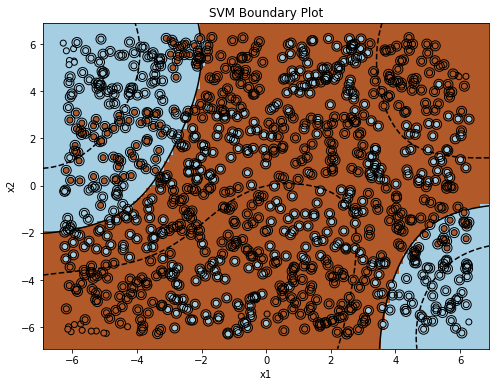

In [117]:
## plot svm boundary
plot_svm_boundary(model_svc_rbf,nonlinear_train_X,nonlinear_train_y)

In [119]:
## print the confusion matrix, accuracy scores for training data.
nonlinear_train_y_pred_rbf = model_svc_rbf.predict(nonlinear_train_X)
print(classification_report(y_true=nonlinear_train_y,y_pred=nonlinear_train_y_pred_rbf))

              precision    recall  f1-score   support

         0.0       0.59      0.30      0.40       486
         1.0       0.54      0.79      0.64       494

    accuracy                           0.55       980
   macro avg       0.56      0.55      0.52       980
weighted avg       0.56      0.55      0.52       980



In [98]:
## predicting labels for non-linear test dataset
nonlinear_test_y_pred_rbf = model_svc_poly.predict(nonlinear_test_X)

In [ ]:
## saving non-linear test result datframe to csv file

## Write your observations with comparisons. (0.5 point)

## Hyper-Parameter Tuning (1.5 point)

In [162]:
## load the data
wine_fraud_csv = pd.read_csv('/content/drive/MyDrive/data/wine_fraud.csv')

In [163]:
## data pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
## apply label encoding to the categorical feature column
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = preprocessing.LabelEncoder()
le.fit(wine_fraud_csv[['type']])
le.transform(wine_fraud_csv[['type']])
changed = le.transform(wine_fraud_csv[['type']])
wine_fraud_csv.drop('type',inplace=True,axis=1)
wine_fraud_csv['type']= changed
X = wine_fraud_csv.loc[:,wine_fraud_csv.columns!='quality']
y = wine_fraud_csv['quality']
## split into X and y, target column is 'quality'

## apply feature standardization
scaler = StandardScaler()
print(scaler.fit(X))

## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

StandardScaler()


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
## train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [182]:
## define param_grid
param_grid={'kernel':['linear','poly','rbf'],'C':[1e-5,1e-4,1e-3,1e-2,1e-1,1],'gamma':['scale','auto'],'degree':[2,3,4]}

In [ ]:
## define Grid Search class
from sklearn.model_selection import GridSearchCV
svm = SVC()
gridSearchCV_model = GridSearchCV(svm,param_grid=param_grid)
gridSearchCV_model.fit(X_train,y_train)

In [ ]:
## print best score
print(gridSearchCV_model.best_score_)


In [ ]:
## print best params
print(gridSearchCV_model.best_params_)


In [ ]:
## train the final model with best parameters

In [ ]:
## classification report for test data